### Contextualizando (pode ignorar, é só pro futuro caio)
A tabela possui uma avaliação de desempenho de modelos de previsão de séries temporarais.
Desempenho dos modelos (AR, ARMA e SARIMA) ao realizar previsões para 4, 8 e 15 semanas no futuro (H)

MAE, RMSE, MASE, FB, AIC - Métricas. quanto menor, melhor.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

# sns.set_style("whitegrid")
# plt.rcParams['figure.figsize'] = [12, 7]
# plt.rcParams['figure.dpi'] = 100

In [41]:
df = pd.read_csv("table.csv")
df.head(22)

,Modelo,H,MAE,RMSE,MASE,FB,AIC
0,AR(4),15,557.280,813.426,17.233,80.36,2779.237
1,"ARMA(2,1)",15,550.828,805.564,17.033,79.43,2779.509
2,"ARMA(2,4)",15,560.068,817.523,17.319,80.76,2775.173
3,"ARMA(3,2)",15,537.327,791.628,16.616,77.48,2780.808
4,"ARMA(4,2)",15,560.985,816.164,17.347,80.89,2773.570
5,"SARIMA(5,0,0)(0,0,1)[52]",15,545.592,800.982,16.871,78.67,2776.115
6,AR(4),8,98.920,119.766,3.059,48.31,2779.237
7,"ARMA(2,1)",8,96.604,117.521,2.987,47.18,2779.509
8,"ARMA(2,4)",8,98.965,119.660,3.060,48.33,2775.173
9,"ARMA(3,2)",8,88.709,109.552,2.743,43.32,2780.808


In [49]:
df[df['Modelo'] == 'AR(4)']

,Modelo,H,MAE,RMSE,MASE,FB,AIC
0,AR(4),15,557.280,813.426,17.233,80.36,2779.237
6,AR(4),8,98.920,119.766,3.059,48.31,2779.237
12,AR(4),4,54.737,57.447,1.693,41.62,2779.237


AR(p) -> Onde p = 4 (valores anteriores da própria série). Autoregressão

In [42]:
import re
def sanitize_filename(name):
    return re.sub(r'[\(\)\[\]\,]', '_', name).replace('__', '_').strip('_')

Acabei nao usando o single_plot, mas tu consegue usar caso queira

In [43]:
def single_plot(h: int, metric='MAE'):
    df_h = df[df['H'] == h].sort_values(by=metric, ascending=True)
    ax = sns.barplot(x='Model', y=metric, data=df_h, palette='viridis')
    ax.set_title(f'Model comparasion for {metric}, h={h}', fontsize=16)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # plt.savefig(f"comp_model_h{h}_{metric}.png")
    plt.close()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def group_plot(model_name:str):
    df_model = df[df['Modelo'] == model_name].sort_values('H')
    metrics = ['MAE', 'RMSE', 'MASE', 'FB', 'AIC']
    model_name_clean = sanitize_filename(model_name)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    axes = axes.flatten()
    fig.suptitle(f"Model performance evaluation: {model_name}", fontsize=12, y=1.03)
    for i, metric in enumerate(metrics):
        sns.barplot(x='H', y=metric, data=df_model, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{metric} per h', fontsize=14)
        axes[i].set_xlabel('Horizon (h)', fontsize=12)
        axes[i].set_ylabel(metric, fontsize=12)

    axes[5].axis('off')

    plt.tight_layout(rect=[0, 0.3, 1, 0.97])
    # plt.savefig(f"{sanitized_name}_metrics_subplots.png")
    plt.close(fig)

    # andré, se puder revisa (nao tive tempo) normalizei as métricas mas posso ter perdido algo (joga no gpt qualquer coisa)
    scaler = MinMaxScaler()
    normalized_data = df_model.copy()
    normalized_data[metrics] = scaler.fit_transform(normalized_data[metrics])

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    
    for metric in metrics:
        sns.lineplot(x='H', y=metric, data=normalized_data, marker='o', markersize=8, label=metric)

    plt.title(f'Normalized metrics trend: {model_name}', fontsize=18)
    plt.xlabel('Horizon (H)', fontsize=14)
    plt.ylabel('Normalized value [0, 1]', fontsize=14)
    plt.xticks(df_model['H'].unique())
    plt.legend(title='Model evaluation')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f"{model_name_clean}_metrics_grouped_normalized.png")
    plt.show()
    plt.close()


plot -> AR(4)


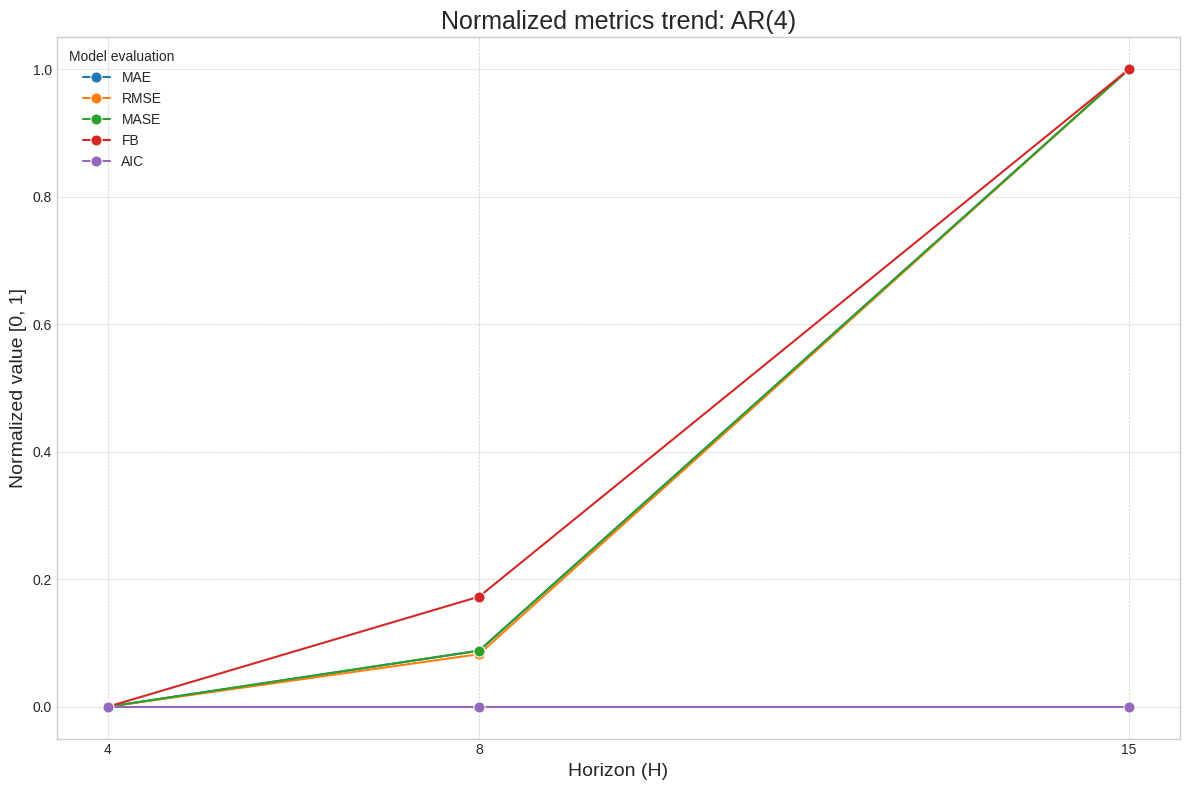

plot -> ARMA(2,1)


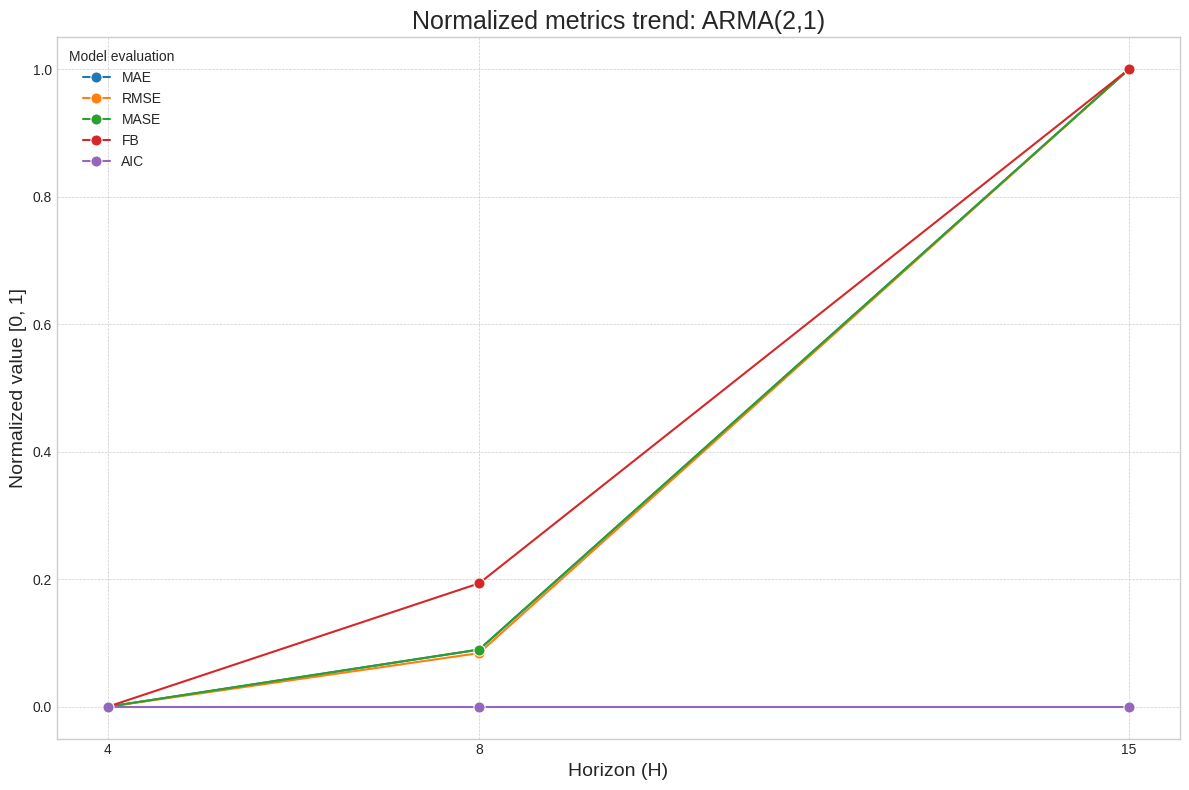

plot -> ARMA(2,4)


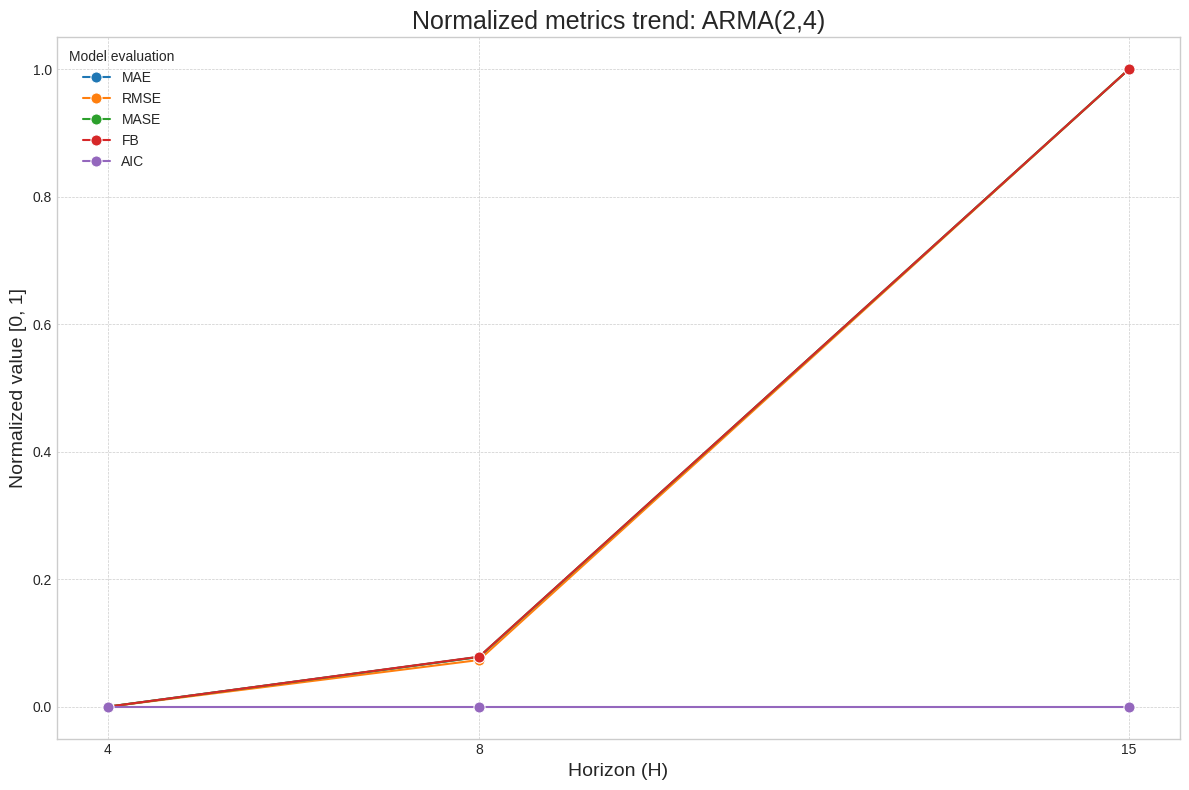

plot -> ARMA(3,2)


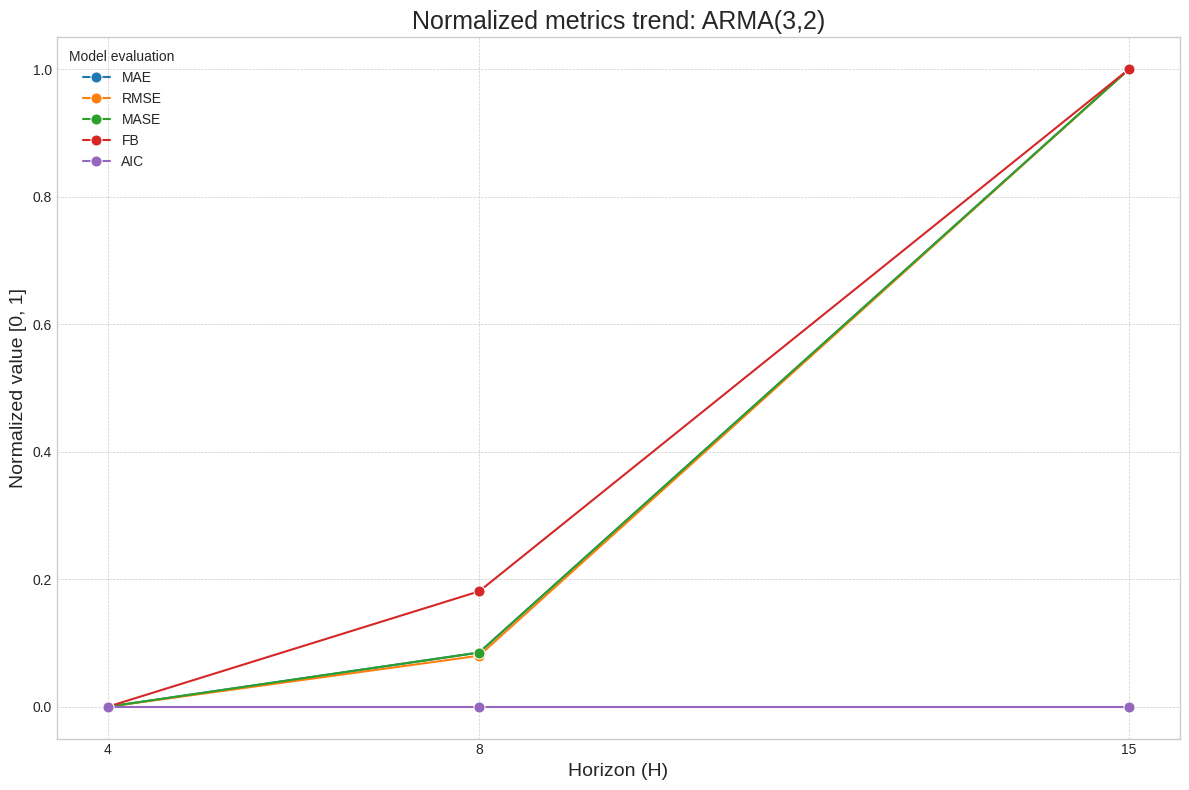

plot -> ARMA(4,2)


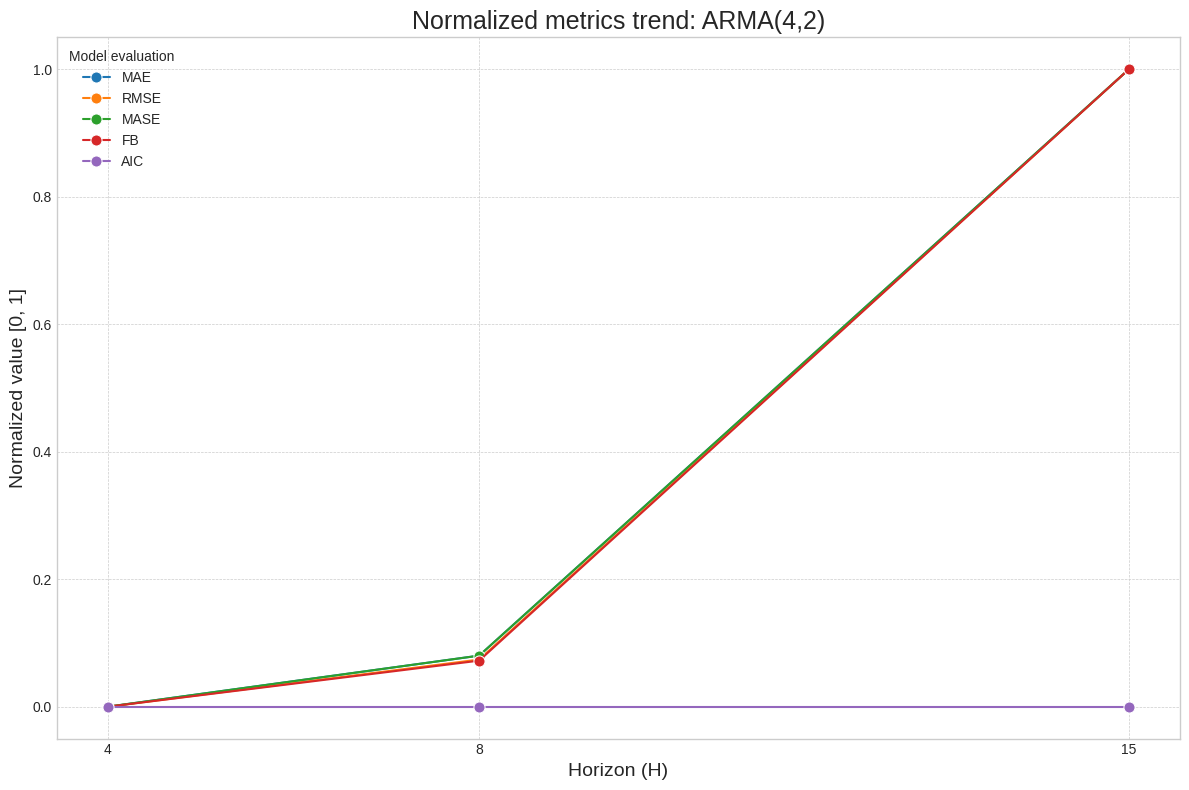

plot -> SARIMA(5,0,0)(0,0,1)[52]


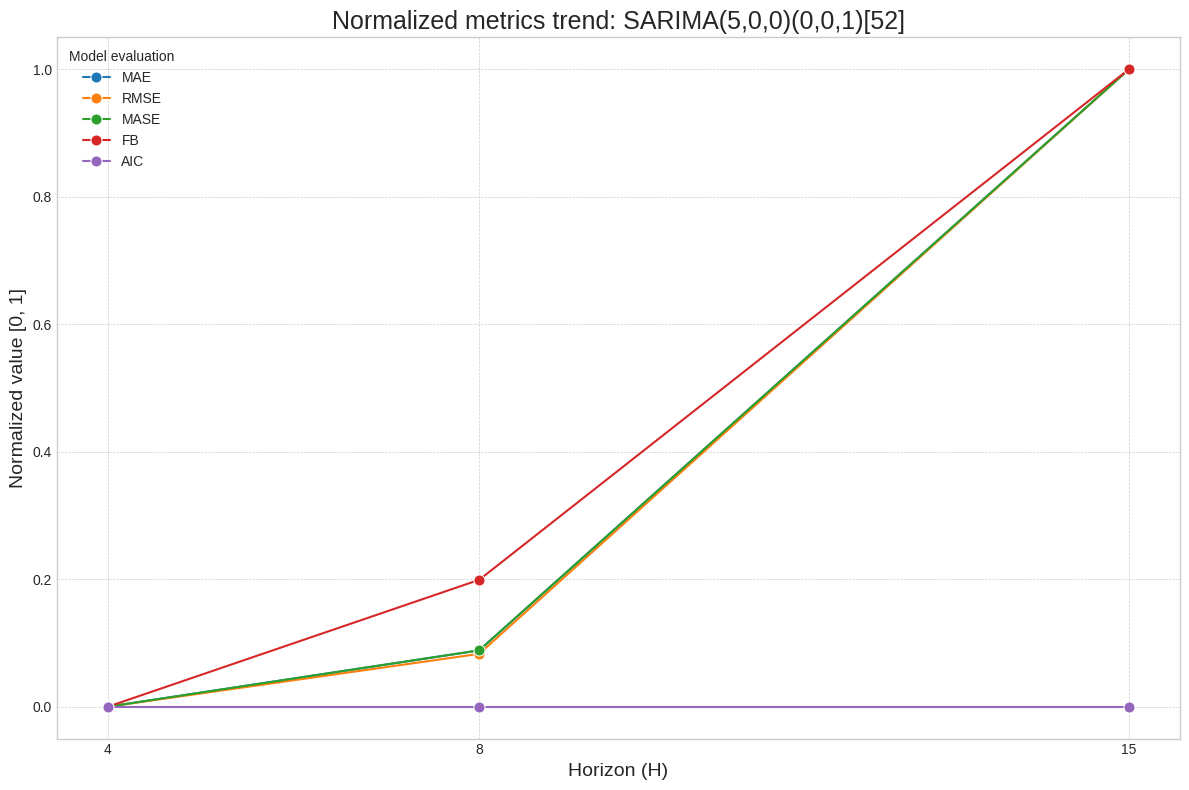

In [45]:
models = df['Modelo'].unique()
for model in models:
    print(f"plot -> {model}")
    group_plot(model)


### Ouputs

Explicando um pouco dos outputs
AIC é uma reta? Sim, por exemplo ARMA(2,4) é uma reta no valor 0.

In [54]:
aic_arma_2_4 = df[df['Modelo'] == 'ARMA(2,4)']
aic_arma_2_4

,Modelo,H,MAE,RMSE,MASE,FB,AIC
2,"ARMA(2,4)",15,560.068,817.523,17.319,80.76,2775.173
8,"ARMA(2,4)",8,98.965,119.660,3.060,48.33,2775.173
14,"ARMA(2,4)",4,59.924,64.455,1.853,45.57,2775.173


Pra h=4, h=8, h=15 o, AIC tem o mesmo valor. Como eu uso MinMaxScaler pra normalizar, ele basicamente faz: (max - min) / (max - min). O valor max = valor min, logo fica tudo 0.